In [113]:
!pip install -U scikit-learn

  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'c:\\users\\kirsch\\anaconda3\\lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [35]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

Load the data for South Africa

In [2]:
sa = pd.read_csv(r"..\Data\SAdata\SA_revised_narrow.csv")

In [3]:
sa.drop("Unnamed: 0",axis = 1, inplace = True)

In [4]:
sa["hour"] = sa["hour"].astype(str).str.zfill(2)

In [5]:
sa["day_of_the_week"] = sa["day_of_the_week"].where(
    (sa["day_of_the_week"] != 'Monday'), '0').where(
    (sa["day_of_the_week"] != 'Tuesday'), '1').where(
    (sa["day_of_the_week"] != 'Wednesday'), '2').where(
    (sa["day_of_the_week"] != 'Thursday'), '3').where(
    (sa["day_of_the_week"] != 'Friday'), '4').where(
    (sa["day_of_the_week"] != 'Saturday'), '5').where(
    (sa["day_of_the_week"] != 'Sunday'), '6')

In [6]:
sa['timestamp'] = sa["season"] + ' ' + sa['day_of_the_week'] + ' ' + sa['hour'] + 'h'

In [7]:
sa.head()

,profile_ID,season,day_of_the_week,hour,consumption_kWh,timestamp
0,12005372,Winter,4,00,0.142214,Winter 4 00h
1,12005372,Winter,4,01,0.138024,Winter 4 01h
2,12005372,Winter,4,02,0.124143,Winter 4 02h
3,12005372,Winter,4,03,0.132000,Winter 4 03h
4,12005372,Winter,4,04,0.147452,Winter 4 04h


Pivot it 

In [8]:
sa_cluster = sa.pivot(index='profile_ID', columns='timestamp', values='consumption_kWh')

In [9]:
sa_cluster.head()

timestamp,Autumn 0 00h,Autumn 0 01h,Autumn 0 02h,Autumn 0 03h,Autumn 0 04h,Autumn 0 05h,Autumn 0 06h,Autumn 0 07h,Autumn 0 08h,Autumn 0 09h,...,Winter 6 14h,Winter 6 15h,Winter 6 16h,Winter 6 17h,Winter 6 18h,Winter 6 19h,Winter 6 20h,Winter 6 21h,Winter 6 22h,Winter 6 23h
profile_ID,,,,,,,,,,,,,,,,,,,,,
12005372,0.136513,0.121000,0.130026,0.118462,0.115641,0.403897,0.126641,0.139897,0.214359,0.242846,...,0.491051,0.416872,0.427308,0.457487,0.439436,0.250179,0.142154,0.121282,0.109154,0.091103
12005376,0.150333,0.190385,0.142154,0.188692,0.551974,0.506846,0.515872,0.556769,0.408410,0.734744,...,0.828103,0.863923,0.970538,1.017923,1.170231,0.905385,0.545769,0.396000,0.206744,0.146103
12005385,0.238051,0.246231,0.232128,0.617692,0.833179,0.512487,0.255256,0.285718,0.456923,0.478923,...,1.770718,1.842923,1.993538,2.467667,3.684718,4.085795,2.186462,1.047538,0.590051,0.325205
12005389,0.760692,0.743487,0.705128,1.052615,1.036821,1.400385,0.906231,1.001282,1.416744,1.664103,...,2.920641,2.957872,2.507436,2.995667,4.223154,4.728308,3.148538,1.610231,0.847564,0.726282
12005398,0.221128,0.223667,0.222821,0.221974,0.219436,0.268513,0.207872,0.149769,0.165000,0.157667,...,0.150615,0.121282,0.143000,0.156821,0.287692,0.429564,0.232974,0.205897,0.207308,0.208154


### Normalising the data 

We are going to divide all value in a row by the maximun of this row. This way all data will be between 0 and 1

In [10]:
sa_norm = sa_cluster.divide(sa_cluster.max(axis = 1), axis=0)

In [11]:
sa_norm.head()

timestamp,Autumn 0 00h,Autumn 0 01h,Autumn 0 02h,Autumn 0 03h,Autumn 0 04h,Autumn 0 05h,Autumn 0 06h,Autumn 0 07h,Autumn 0 08h,Autumn 0 09h,...,Winter 6 14h,Winter 6 15h,Winter 6 16h,Winter 6 17h,Winter 6 18h,Winter 6 19h,Winter 6 20h,Winter 6 21h,Winter 6 22h,Winter 6 23h
profile_ID,,,,,,,,,,,,,,,,,,,,,
12005372,0.187961,0.166602,0.179029,0.163107,0.159223,0.556116,0.174369,0.192621,0.295146,0.334369,...,0.676117,0.573981,0.588350,0.629903,0.605049,0.344466,0.195728,0.166990,0.150291,0.125437
12005376,0.100113,0.126784,0.094666,0.125657,0.367581,0.337528,0.343539,0.370774,0.271976,0.489294,...,0.551465,0.575319,0.646319,0.677874,0.779301,0.602930,0.363449,0.263711,0.137678,0.097295
12005385,0.055957,0.057880,0.054565,0.145197,0.195850,0.120467,0.060001,0.067162,0.107406,0.112577,...,0.416230,0.433203,0.468607,0.580057,0.866141,0.960419,0.513956,0.246237,0.138699,0.076444
12005389,0.141108,0.137917,0.130801,0.195260,0.192330,0.259771,0.168105,0.185737,0.262805,0.308690,...,0.541778,0.548684,0.465128,0.555695,0.783394,0.877099,0.584053,0.298697,0.157223,0.134725
12005398,0.223744,0.226313,0.225457,0.224600,0.222032,0.271689,0.210331,0.151541,0.166952,0.159532,...,0.152397,0.122717,0.144692,0.158676,0.291096,0.434646,0.235731,0.208333,0.209760,0.210616


In [44]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(sa_norm)

In [45]:
centroids = kmeans.cluster_centers_ 

In [46]:
centroids


array([[0.15710278, 0.14963057, 0.14925354, ..., 0.36350672, 0.27083703,
        0.20063725],
       [0.09412237, 0.08860963, 0.08349418, ..., 0.285834  , 0.18284175,
        0.12259458],
       [0.25725472, 0.25127258, 0.24346603, ..., 0.40233561, 0.32426679,
        0.2609199 ],
       [0.06110181, 0.05900874, 0.06218923, ..., 0.05867623, 0.04472545,
        0.05016268]])

In [47]:
labels = list(kmeans.labels_)


In [48]:
labels.count(0)

146

In [49]:
labels.count(1)

133

In [50]:
labels.count(2)

74

In [51]:
labels.count(3)

34

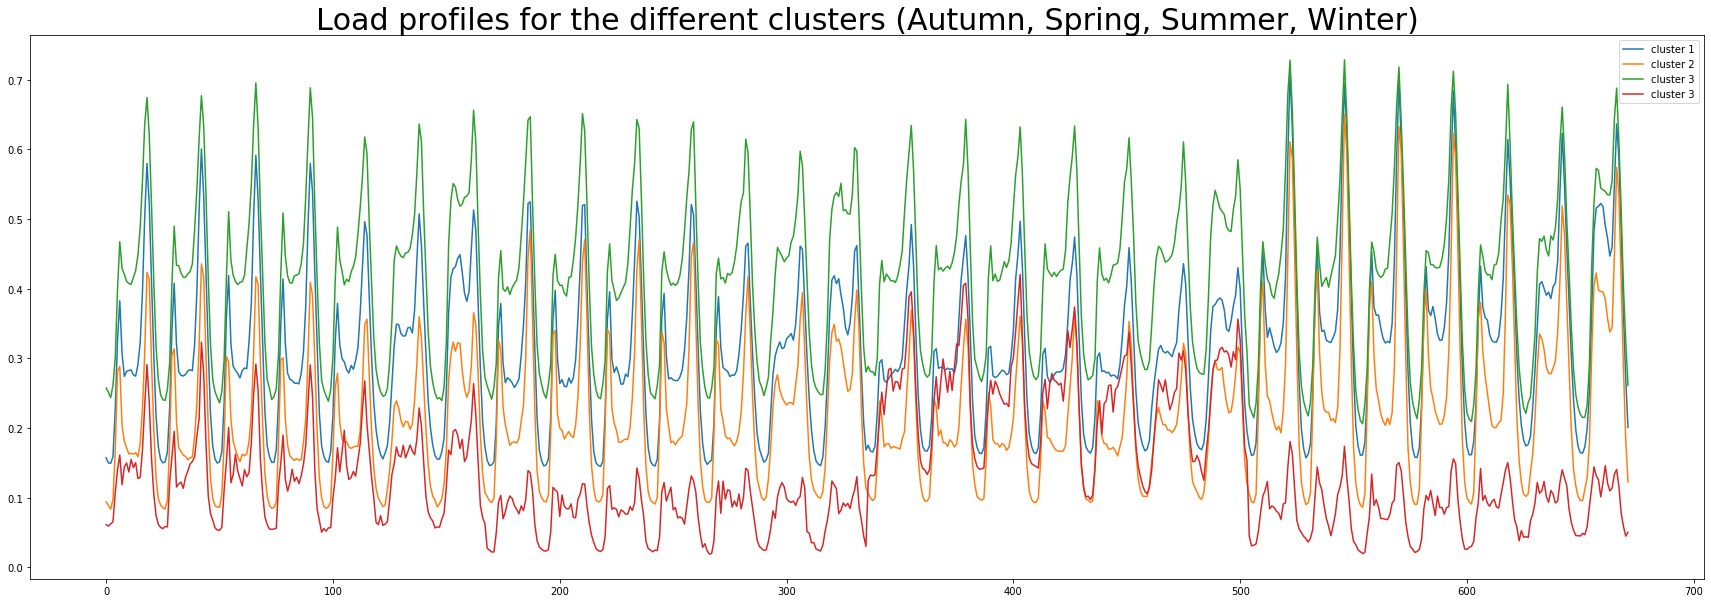

In [52]:
figure(figsize=(30,10))


plt.plot(centroids[0], label = "cluster 1") 
plt.plot(centroids[1], label = "cluster 2") 
plt.plot(centroids[2], label = "cluster 3") 
plt.plot(centroids[3], label = "cluster 3") 

plt.title("Load profiles for the different clusters (Autumn, Spring, Summer, Winter)", size = 30)

plt.legend() 
plt.savefig('loads.png')
plt.show()


### Select the value of k

Elbow method with the WCSS

C:\Users\Kirsch\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


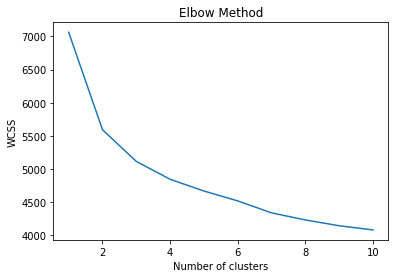

In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sa_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Daves-Bouldin index

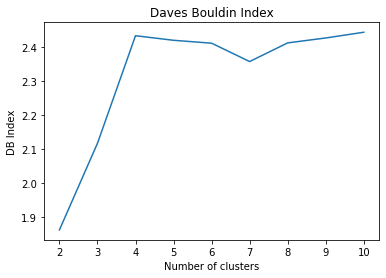

In [38]:
db = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sa_norm)
    clusters = kmeans.labels_
    db.append(davies_bouldin_score(sa_norm, clusters))
plt.plot(range(2, 11), db)
plt.title('Daves Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.show()